## Optimizing Hotel Revenue with Booking Cancellation Forecasting

### Introduction

Hotel booking cancellations pose significant challenges to revenue management and operational planning in the hospitality industry. Accurately predicting cancellations can help hotels reduce financial losses, optimize resource allocation, and improve customer service. This project, based on the Kaggle Playground Series S3E7 dataset, focuses on building a machine learning model to classify whether a booking will be canceled using historical booking data.

### About Dataset


The dataset used in this project is a synthetic dataset provided by Kaggle as part of the Playground Series - Season 3, Episode 7 competition. It represents hotel booking records and includes various numerical features that describe customer behavior, booking details, and stay conditions.

Target Variable:
Booking status – Binary classification label indicating whether a booking was canceled (1) or not canceled (0).

Booking Features:

Lead time: Number of days between the booking and check-in.

no of special requests: Count of special requests made by the customer.

avg price per room: Average daily rate for the room.

previous cancellations: Number of past cancellations made by the customer.

no of weekend nights, no of week nights: Duration of stay.

Customer Information:

no of adults, no of children, no of week nights: Details about guests.

repeated guest, type of meal plan, and more.


The dataset is entirely numeric and requires careful preprocessing and feature understanding to build an effective model.


### Objectives

To build a machine learning classification model that predicts whether a hotel booking

will be canceled. This involves:

*  Performing EDA to identify key patterns and trends.

* Handling potential class imbalance and sparse data.

* Building and evaluating various classification algorithms.

* Improving model accuracy through tuning and validation.


## Importing Necessary Libraries

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


You've imported standard libraries for data analysis, visualization, preprocessing, model building, and evaluation. Usage of both RandomForest and XGBoost suggests a focus on ensemble models.

## Load the data

In [5]:
df=pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv')
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


The dataset is loaded from Kaggle. This line just loads and shows the entire DataFrame.

## Read the dataset

In [6]:
print('First 5 rows:')
df.head()

First 5 rows:


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
print('Shape of the dataset:')
df.shape

Shape of the dataset:


(42100, 19)

* Number of rows and columns (e.g., (79,462 rows × 19 columns)
* These lines help you understand the structure and size of the dataset before diving deeper.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

This shows whether there are missing values, what data types each column has, and how clean the data is.

In [9]:
print('Summary statistics:')
df.describe()

Summary statistics:


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


The dataset contains a wide range of booking scenarios and customer behaviors, offering valuable information for cancellation prediction.

* Lead time: Longer time between booking and check-in may lead to more cancellations.

* Special requests: More requests may indicate strong intent to show up.

* Room prices: Large variations may affect cancellation rates.

* Previous cancellations: Strong predictor of future cancellations.

* Repeat guests: Likely more reliable.

* Booking status is the target column:     0 = confirmed, 1 = canceled.
  We may need to check if the dataset is   imbalanced (more of one type).



### Checking for Missing Values

In [10]:
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


Dataset is clean , no missing values. That makes preprocessing easier.

#### Checking for Duplicates

In [11]:

# Count duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


checked for duplicate entries, a good data hygiene step. It’s not shown here if duplicates exist, but you can remove them if needed.

#### Checking for Categorical Columns

In [12]:
# Check data types of each column
print(df.dtypes)

#OR show only columns with 'object' (i.e., string/categorical) data type
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:")
print(categorical_columns)


id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object
Categorical columns in the dataset:
Index([], dtype='object')


There are no categorical columns, so no need for encoding techniques like one-hot encoding. Everything is numerical—perfect for ML algorithms.

### Data Cleaning: Handling Invalid Entries

In [13]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/playground-series-s3e7/train.csv")

# Step 1: Remove rows where both no_of_adults and no_of_children are 0
df_cleaned = df[~((df['no_of_adults'] == 0) & (df['no_of_children'] == 0))]

# Step 2: Drop rows with missing values in arrival date columns
df_cleaned = df_cleaned.dropna(subset=['arrival_year', 'arrival_month', 'arrival_date'])

# Safely convert to datetime, handling invalid dates
df_cleaned['arrival_datetime'] = pd.to_datetime({
    'day': df_cleaned['arrival_date'].astype(int),
    'month': df_cleaned['arrival_month'].astype(int),    
    'year': df_cleaned['arrival_year'].astype(int)
}, errors='coerce')

# Remove rows with invalid dates
df_cleaned = df_cleaned.dropna(subset=['arrival_datetime'])

# Drop the original columns
df_cleaned = df_cleaned.drop(['arrival_year', 'arrival_month', 'arrival_date'], axis=1)

# Optional: Save the cleaned file
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

df=df_cleaned
df

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_datetime
0,0,2,0,0,2,1,0,0,9,1,1,11,0,67.50,0,0,2018-01-14
1,1,2,0,1,2,0,0,0,117,0,0,0,0,72.25,0,0,2018-07-29
2,2,2,0,0,1,0,0,0,315,0,0,0,0,52.00,0,0,2018-12-02
3,3,1,0,0,2,1,0,0,32,1,0,0,0,56.00,0,0,2018-12-01
4,4,2,0,1,0,0,0,0,258,0,0,0,0,100.00,0,1,2018-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,1,0,0,0,140.00,2,1,2018-12-30
42096,42096,2,0,0,3,0,0,0,34,0,0,0,0,224.67,0,0,2017-09-23
42097,42097,2,0,0,2,2,0,0,292,0,0,0,0,96.00,0,0,2018-07-21
42098,42098,1,0,0,3,0,0,0,5,0,0,0,0,120.00,0,0,2018-11-09


1. Removed rows where both no_of_adults and no_of_children are zero

2. Converted arrival columns to a proper datetime format

3. Dropped invalid dates and original date columns

This step ensures  dataset is realistic and clean. Removing rows with no guests and fixing date formatting is essential for reliable predictions.



### Detect Outliers using IQR Method

Using the Interquartile Range (IQR) method, you identify extreme values. This is a solid step before scaling or modeling

In [14]:
import pandas as pd

# Step 1: Specify the columns where you want to detect outliers
columns_to_check = ['no_of_weekend_nights', 'no_of_week_nights',
                    'lead_time','no_of_previous_cancellations',
                    'no_of_previous_bookings_not_canceled','avg_price_per_room'
                    ] 

# Step 2: Convert columns to numeric if needed (optional)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Step 3: Outlier detection using IQR
outliers = {}

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = outlier_rows.shape[0]

# Step 4: Display the result
pd.DataFrame(outliers.items(), columns=["Column", "Number of Outliers"])



,Column,Number of Outliers
0,no_of_weekend_nights,18
1,no_of_week_nights,427
2,lead_time,379
3,no_of_previous_cancellations,345
4,no_of_previous_bookings_not_canceled,1104
5,avg_price_per_room,1796


### Skewness & Histograms of Numerical Columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

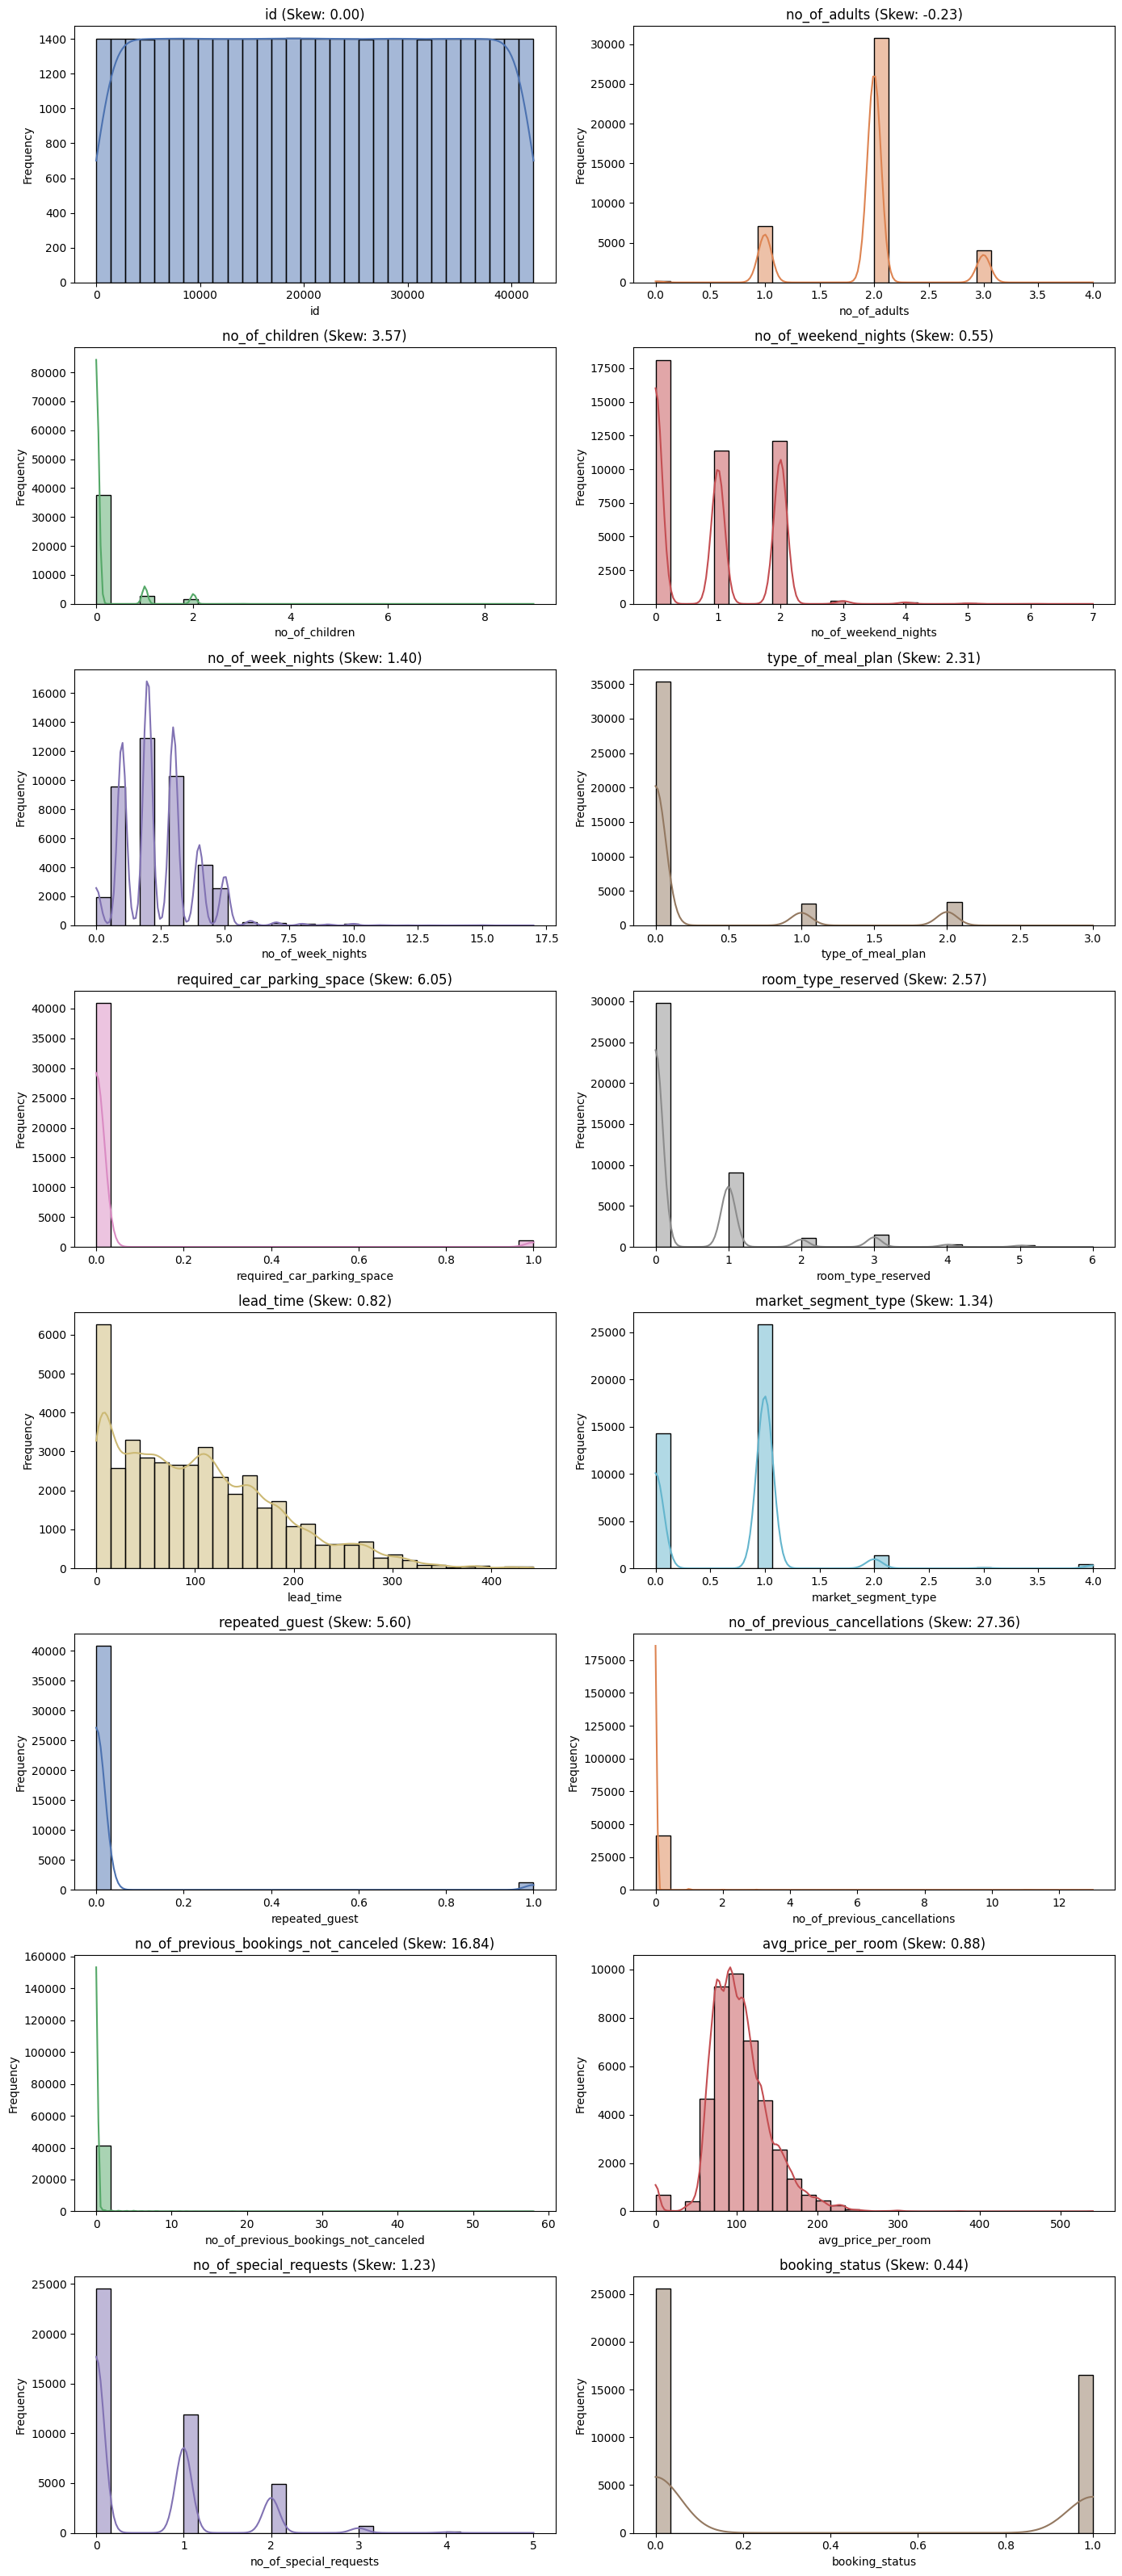

In [22]:
from scipy.stats import skew
# STEP 6: Skewness Plot with Histogram + Color Palette
numeric_cols = df.select_dtypes(include='number').columns

n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

#  Use pastel color palette
colors = sns.color_palette("deep", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(df[col], kde=True, bins=30, color=colors[i], ax=ax)
    sk = skew(df[col].dropna())
    ax.set_title(f"{col} (Skew: {sk:.2f})")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We plotted the distribution of each numeric column using histograms and KDE curves, along with their skewness values.

Low skewness: no_of_weekend_nights, no_of_week_nights :- Good, no transformation needed.

Moderate skewness: lead_time, avg_price_per_room, no_of_special_requests :- Consider transforming if model is sensitive.

High skewness (categorical encoded): type_of_meal_plan, room_type_reserved, market_segment_type :- These are categorical and should be one-hot encoded.

Target skewness: Slight imbalance (skew = 0.44)

Do not transform categorical columns for skewness. Instead, apply one-hot encoding.


####  Class Imbalance Check

In [17]:
print(df['booking_status'].value_counts(normalize=True) * 100)

booking_status
0    60.774611
1    39.225389
Name: proportion, dtype: float64


Class 0 (Not Canceled): 60.77%

Class 1 (Canceled): 39.23%

This is a moderate imbalance 

### Univariate Analysis: Histograms + Boxplots

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

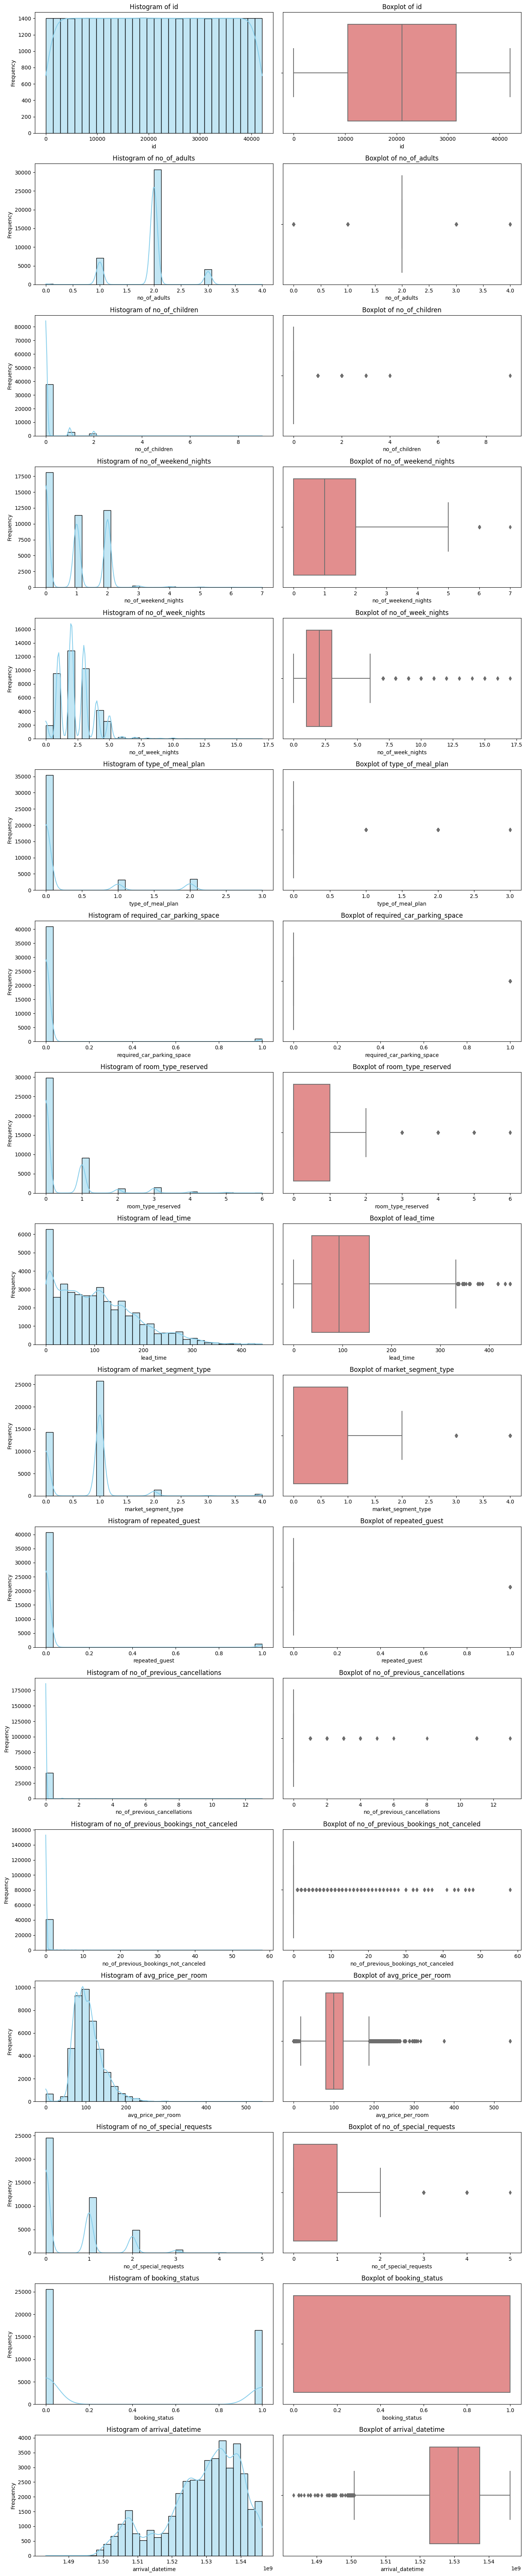

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/working/cleaned_dataset.csv')

# # Convert datetime column to numerical (timestamp) if needed
if 'arrival_datetime' in df.columns:
    df['arrival_datetime'] = pd.to_datetime(df['arrival_datetime'], errors='coerce')
    df['arrival_datetime'] = df['arrival_datetime'].astype('int64') // 10**9  # convert to seconds

# Updated numeric column list (make sure they are numeric!)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plotting
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(14, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=30, color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()


| Feature                        | Pattern                   | Insight                                  |
| ------------------------------ | ------------------------- | ---------------------------------------- |
| `no_of_adults`                 | Mostly 2 adults           | Family/couple bookings dominate          |
| `no_of_children`               | Mostly 0                  | Child-less bookings common               |
| `no_of_weekend_nights`         | Mostly 0-2 nights         | Short trips common                       |
| `lead_time`                    | Wide range, many outliers | Booking made months in advance           |
| `no_of_previous_cancellations` | Mostly 0                  | Repeat cancellers are rare but important |
| `avg_price_per_room`           | ₹50-150 common            | High price → possible influence          |
| `no_of_special_requests`       | 0–2 requests common       | May affect booking chance                |


####  Categorical Feature Distribution (Count Plots)

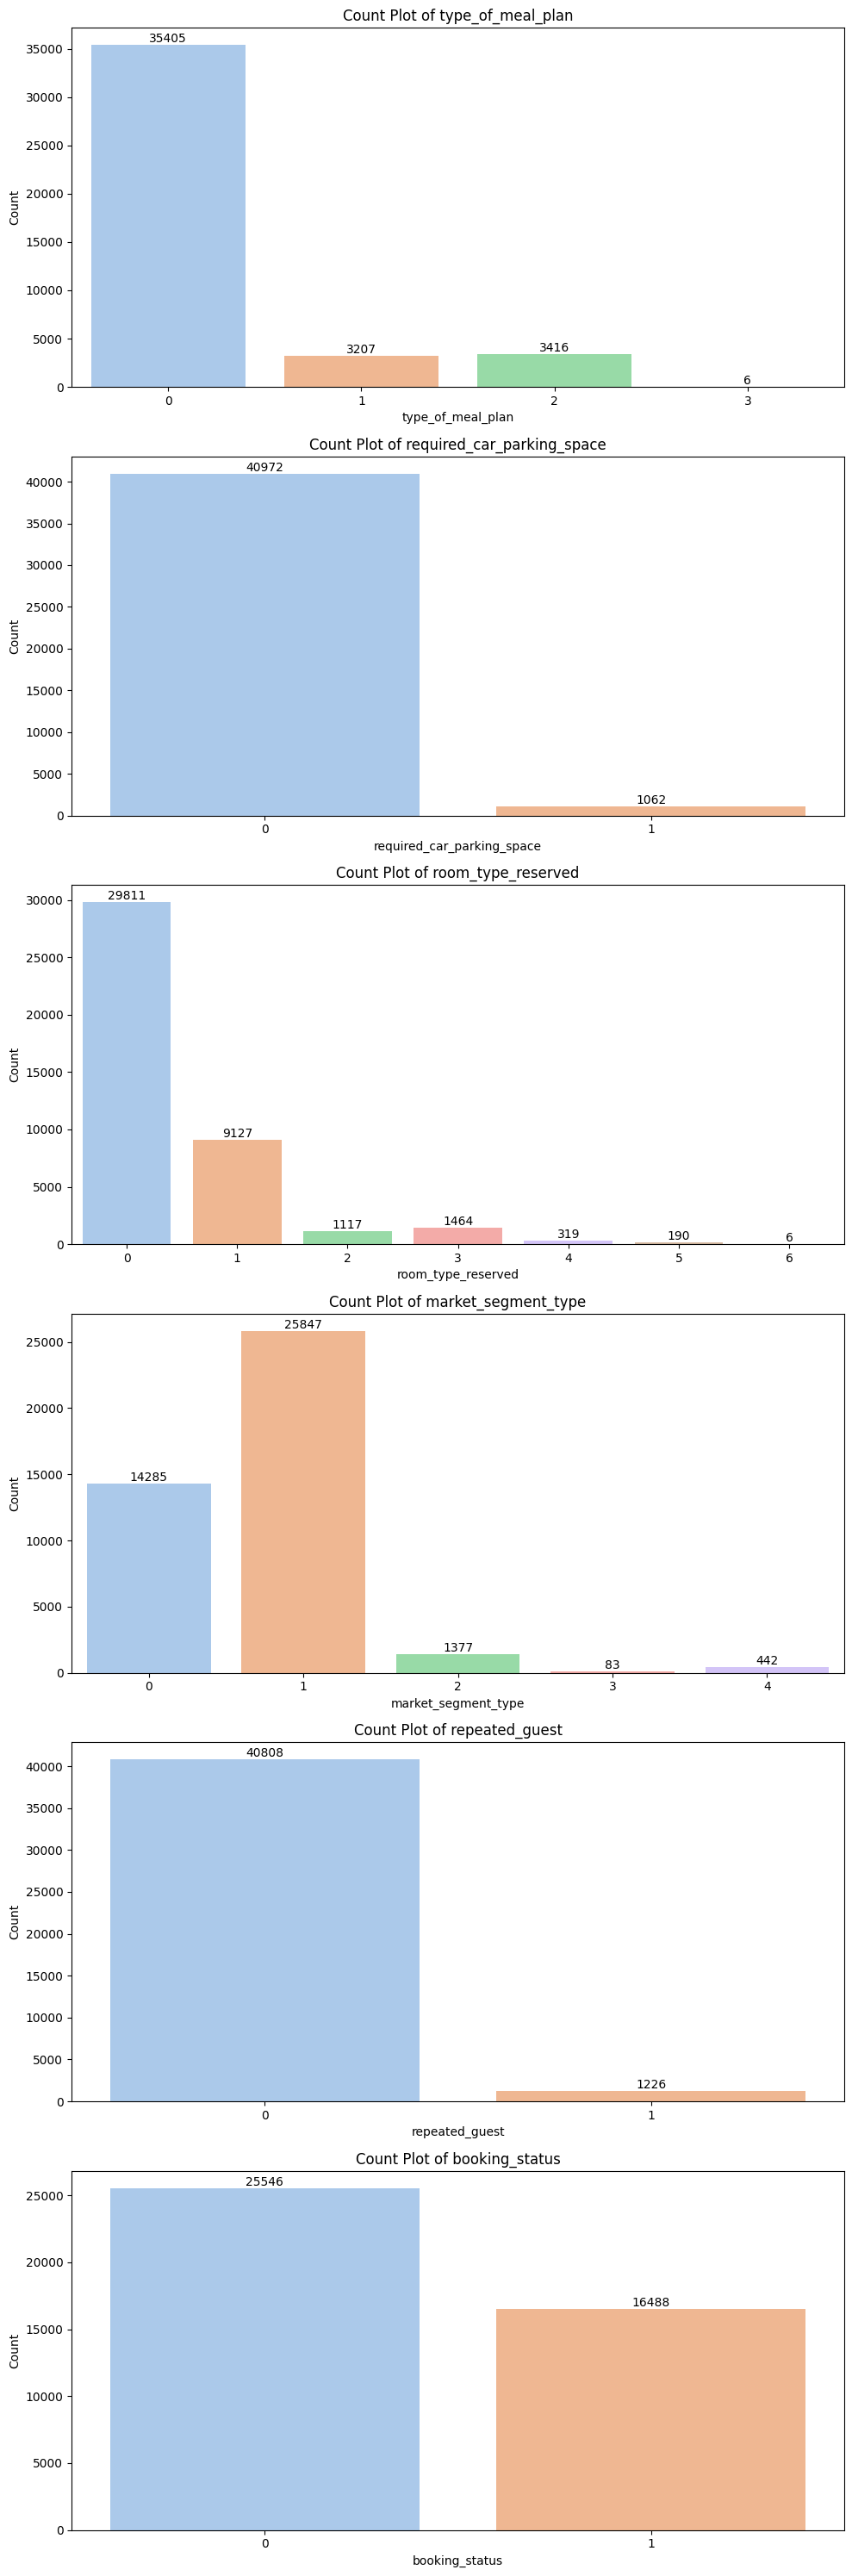

In [24]:
# Categorical columns (numerical IDs used to represent categories)
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space',
                    'room_type_reserved', 'market_segment_type',
                    'repeated_guest', 'booking_status']

# Countplots
n = len(categorical_cols)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, 5 * n))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].bar_label(axes[i].containers[0])  # To show value labels on bars

plt.tight_layout()
plt.show()


| Column Name                  | Meaning / Description                                            |
| ---------------------------- | ---------------------------------------------------------------- |
| `type_of_meal_plan`          | 0,1,2,3 → Meal Plan A, B, C, or Not Selected                     |
| `required_car_parking_space` | 1 → Car parking is required, 0 → Car parking not required        |
| `room_type_reserved`         | Values from 0–6 indicating different room categories             |
| `market_segment_type`        | 0,1,2... → Booking channel like Online, Offline, Corporate, etc. |
| `repeated_guest`             | 1 → Returning customer, 0 → New customer                         |
| `booking_status`             | 1 → Booking confirmed, 0 → Booking cancelled                     |


These should be treated as categorical variables and encoded accordingly (One-Hot Encoding).

##  Bivariate and Multivariate Analysis




### Numeric To Numeric: Correlation matrix and scatterplots

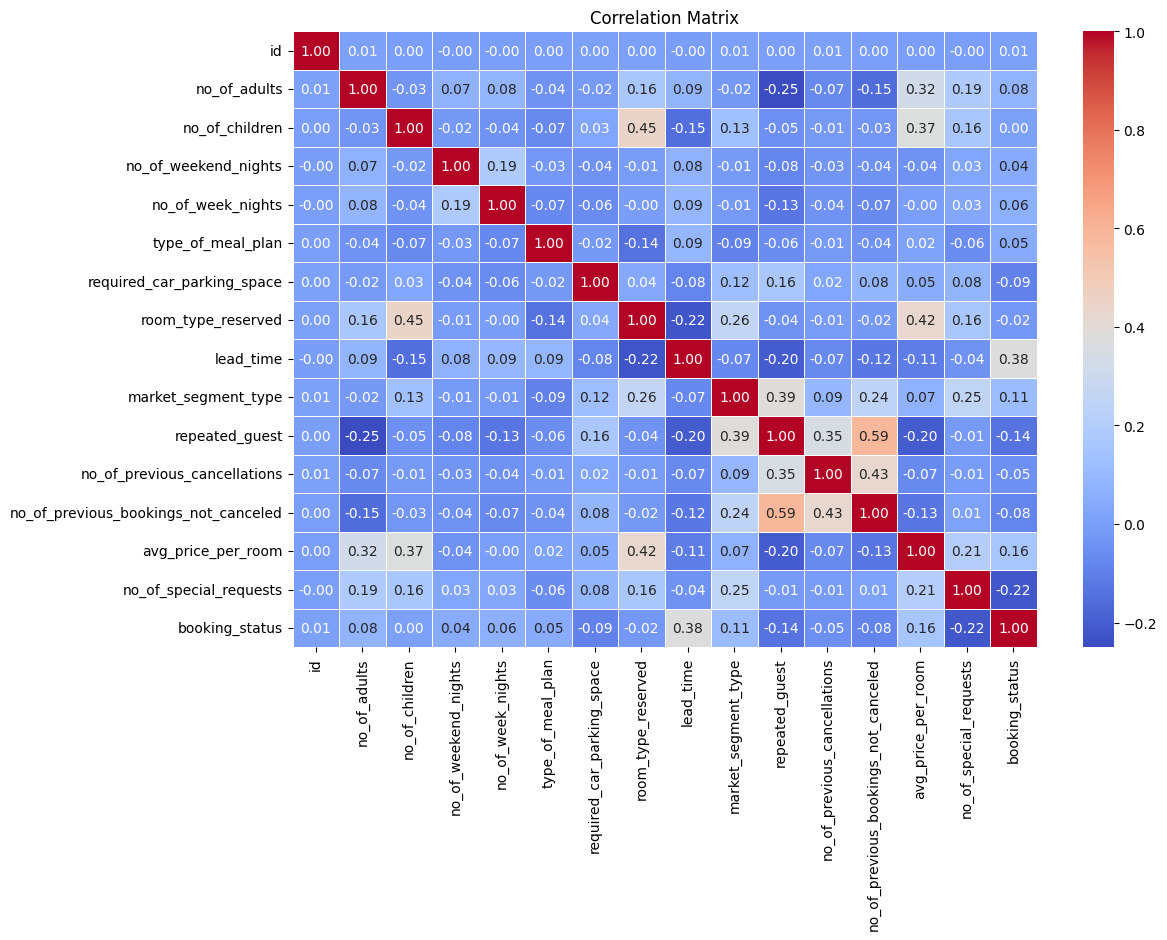

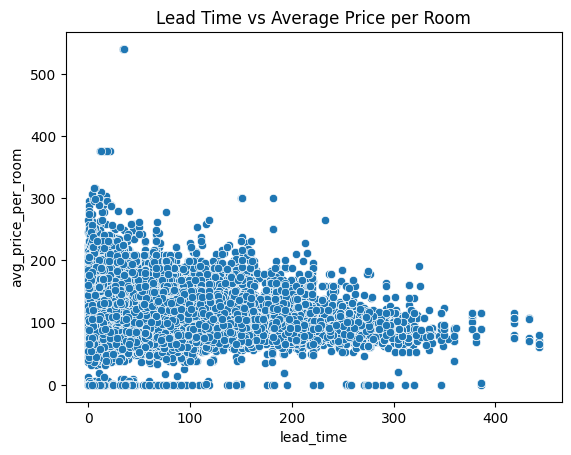

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 2. Scatterplot Example (between 2 variables)
sns.scatterplot(x='lead_time', y='avg_price_per_room', data=df)
plt.title('Lead Time vs Average Price per Room')
plt.show()

Plots heatmap of correlation matrix for all numeric columns

Draws a scatterplot between lead_time and avg_price_per_room

Correlation Heatmap helps find strongly related features. Look for high values (>|0.5|) that may indicate multicollinearity or predictive power.

Scatterplot Insight: As lead_time increases, price also fluctuates heavily. Booking early might be linked to price-sensitive users who cancel often.

### Numeric-Categorical: Boxplots or violin plots grouped by categories

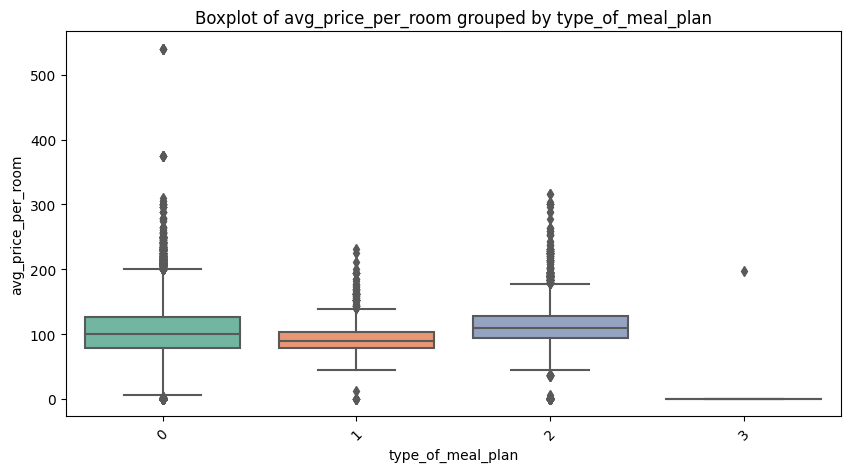

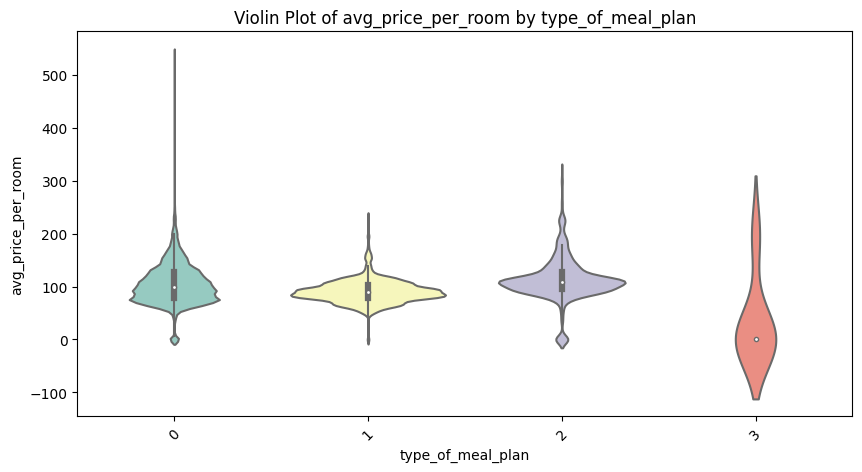

In [30]:
# Choose a categorical column and a numeric column
categorical_col = 'type_of_meal_plan'  # change as needed
numeric_col = 'avg_price_per_room'

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=categorical_col, y=numeric_col, data=df, palette='Set2')
plt.title(f'Boxplot of {numeric_col} grouped by {categorical_col}')
plt.xticks(rotation=45)
plt.show()

# Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=categorical_col, y=numeric_col, data=df, palette='Set3')
plt.title(f'Violin Plot of {numeric_col} by {categorical_col}')
plt.xticks(rotation=45)
plt.show()


Purpose: Compare distribution of avg_price_per_room across different meal plans.

1. Some meal plans may have higher price variations.

2. Helps identify how categories affect pricing, possibly impacting cancellations.

### Categorical-Categorical: Contingency tables, stacked bar charts.


Contingency Table:
booking_status           0      1
market_segment_type              
0                    11055   3230
1                    12775  13072
2                     1216    161
3                       65     18
4                      435      7


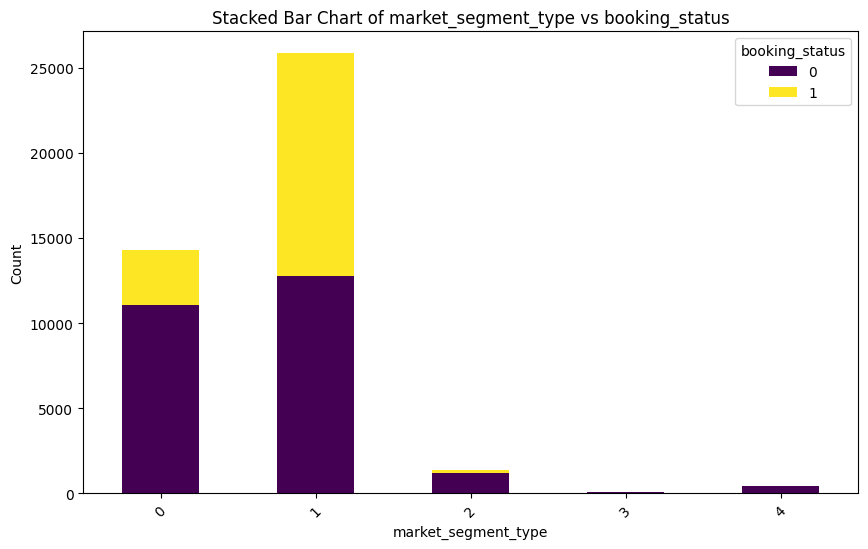

In [31]:
# Example: market_segment vs booking_status
cat1 = 'market_segment_type'
cat2 = 'booking_status'

# Contingency Table
contingency = pd.crosstab(df[cat1], df[cat2])
print("Contingency Table:")
print(contingency)

# Stacked Bar Chart
contingency.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title(f'Stacked Bar Chart of {cat1} vs {cat2}')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title=cat2)
plt.show()


Crosstab of market_segment_type vs booking_status

Plotted as a stacked bar chart

1. Certain market segments (e.g., Online) may have higher cancellation rates.

2. This can inform business strategies (e.g., offer deals only to loyal offline customers).


## Time Series Trend Analysis

In [43]:
# Convert to datetime if not already
df['arrival_datetime'] = pd.to_datetime(df['arrival_datetime'], errors='coerce')

# Optional: sort by date
df = df.sort_values('arrival_datetime')

Datetime parsing & sorting done on arrival_datetime

### Daily booking Trend

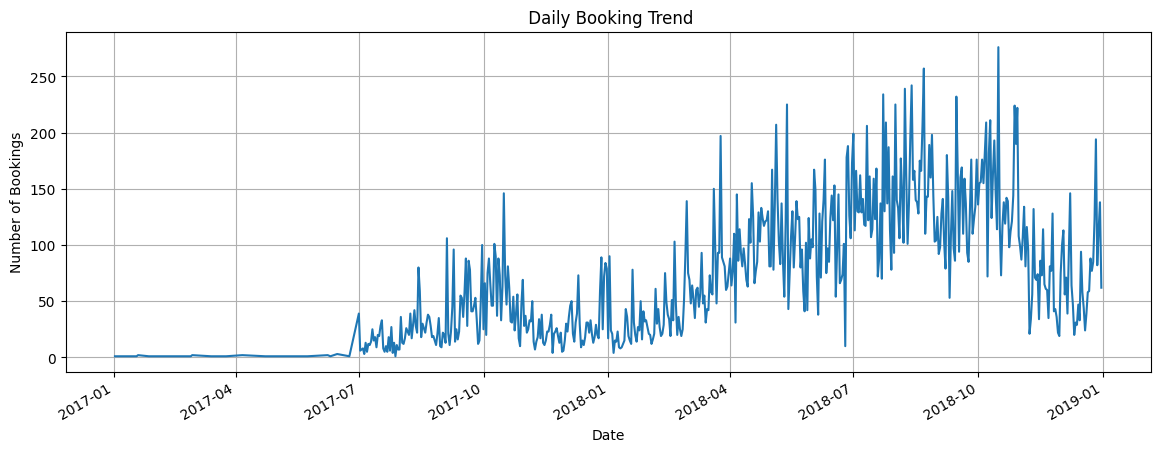

In [42]:
# Create daily booking count
daily_trend = df.groupby('arrival_datetime').size()

# Plot
plt.figure(figsize=(14, 5))
daily_trend.plot()
plt.title(" Daily Booking Trend")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.show()

Line plot showing daily booking volume

Shows daily fluctuation. Can detect peaks (holidays, weekends) and dips (off-season, weekday lulls).

### Monthly booking trend

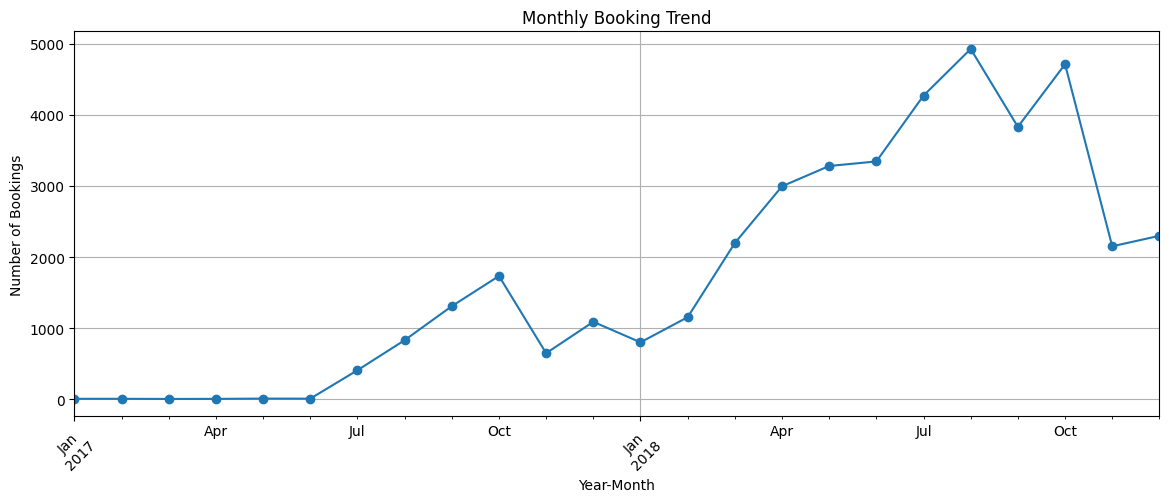

In [44]:
# Monthly bookings
df['year_month'] = df['arrival_datetime'].dt.to_period('M')
monthly_trend = df.groupby('year_month').size()

# Plot
monthly_trend.plot(kind='line', marker='o', figsize=(14, 5))
plt.title("Monthly Booking Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Bookings grouped by year_month and plotted

You can see seasonal trends, e.g., more bookings in November–January.

### Booking Density by Day and Month

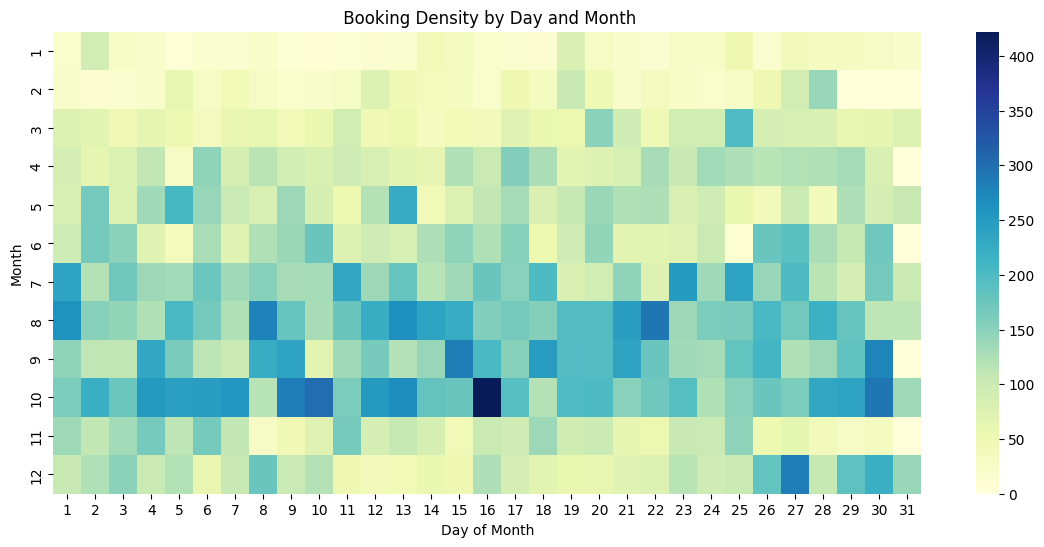

In [45]:
# Create new columns
df['day'] = df['arrival_datetime'].dt.day
df['month'] = df['arrival_datetime'].dt.month

# Pivot for heatmap
pivot = df.pivot_table(index='month', columns='day', aggfunc='size', fill_value=0)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title(" Booking Density by Day and Month")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.show()


Bookings grouped by year_month and plotted

1. Visually shows hotspot days, like 1st or weekends with high booking counts.

2. Useful for pricing and staffing decisions.

### Handle the outliers 

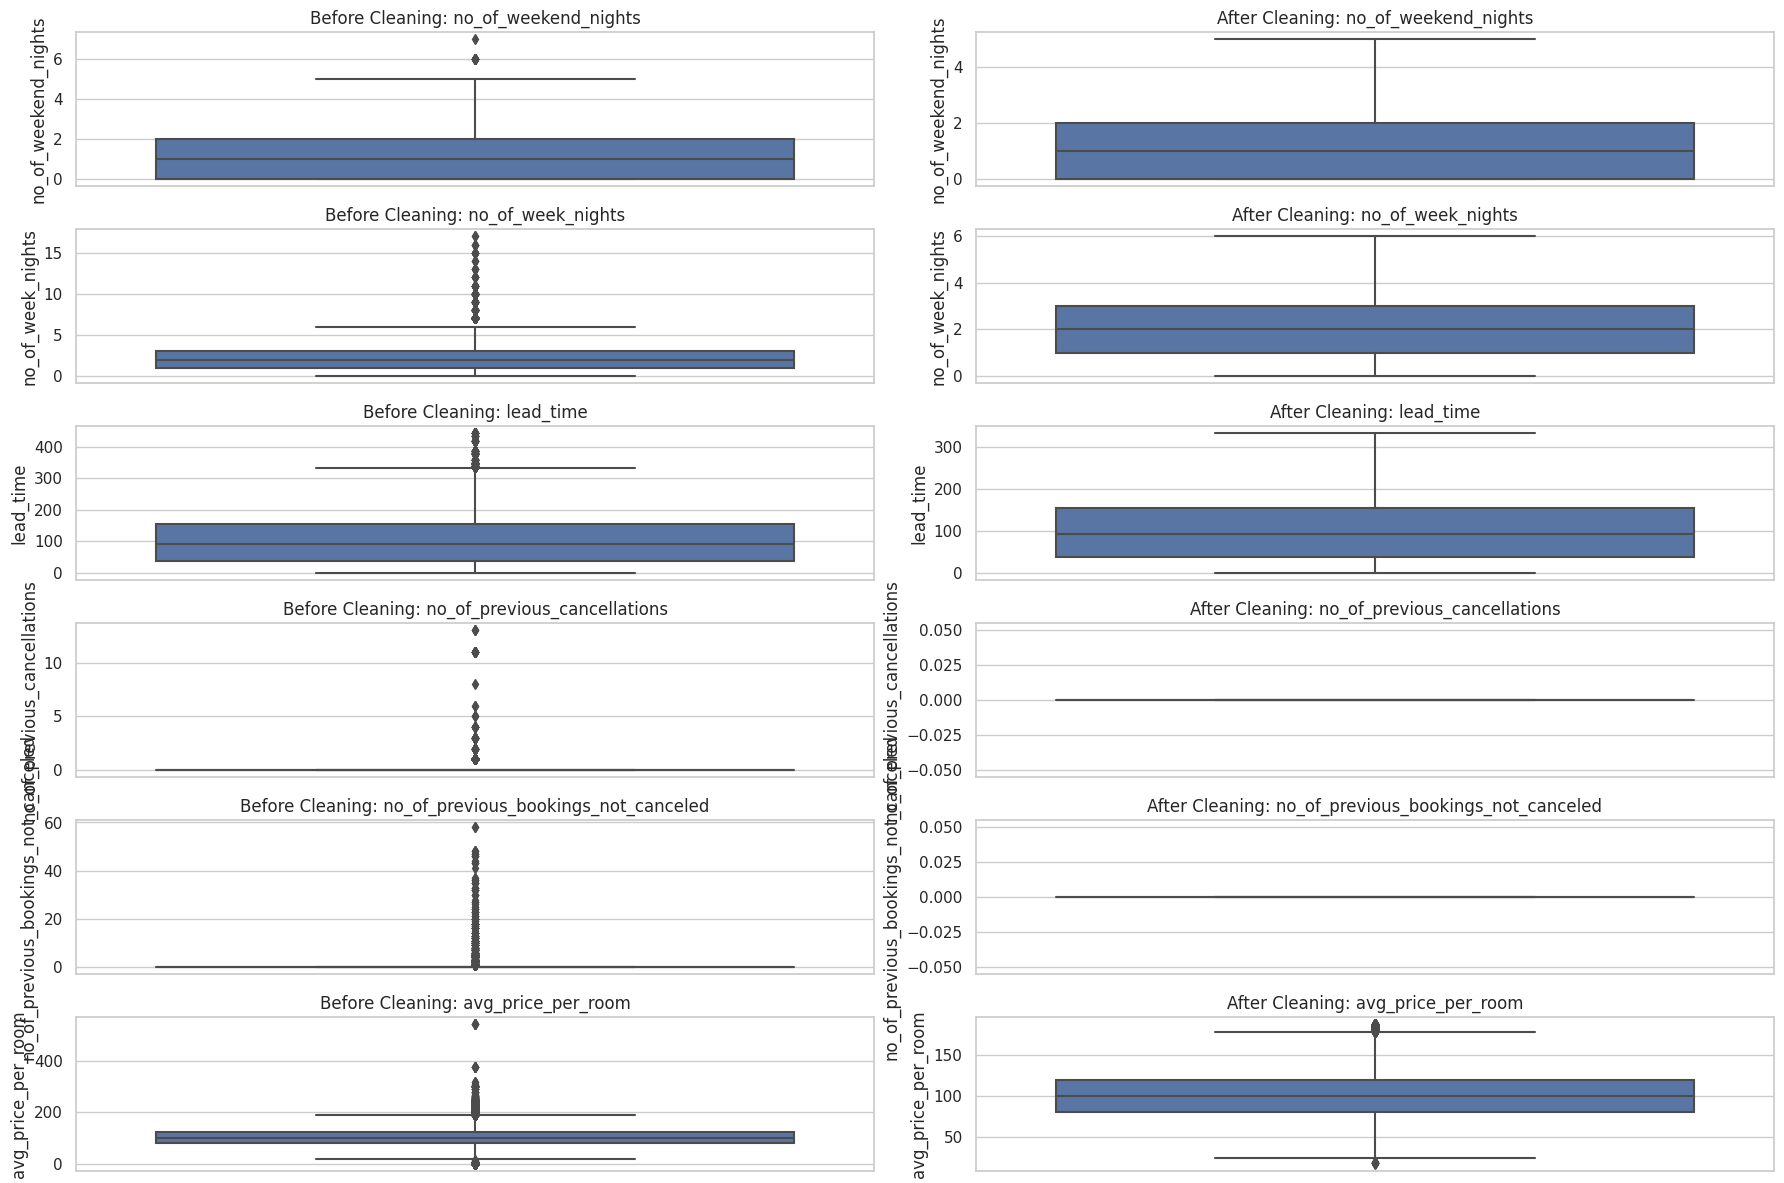

 Before Cleaning:
       no_of_weekend_nights  no_of_week_nights     lead_time  \
count          42034.000000       42034.000000  42034.000000   
mean               0.884356           2.397987    103.941904   
std                0.885827           1.427167     81.066551   
min                0.000000           0.000000      0.000000   
25%                0.000000           1.000000     37.000000   
50%                1.000000           2.000000     93.000000   
75%                2.000000           3.000000    155.000000   
max                7.000000          17.000000    443.000000   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                  42034.000000                          42034.000000   
mean                       0.019746                              0.175929   
std                        0.326092                              1.733403   
min                        0.000000                              0.000000   
25%                 

In [50]:

# 1. Load Data (if not already loaded)
df = pd.read_csv("/kaggle/working/cleaned_dataset.csv")
# Keep a copy of original data for comparison
df_before = df.copy()

# 3. Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    if col == 'avg_price_per_room':
        mean_value = df[col].mean()
        df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    else:
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

for i, col in enumerate(columns_to_check):
    plt.subplot(len(columns_to_check), 2, 2*i + 1)
    sns.boxplot(data=df_before, y=col)
    plt.title(f'Before Cleaning: {col}')

    plt.subplot(len(columns_to_check), 2, 2*i + 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'After Cleaning: {col}')

plt.tight_layout()
plt.show()

# Before Cleaning
print(" Before Cleaning:")
print(df_before[columns_to_check].describe())

# After Cleaning
print("\n After Cleaning:")
print(df[columns_to_check].describe())



In [51]:
# Check data types of each column
print(df.dtypes)

#OR show only columns with 'object' (i.e., string/categorical) data type
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:")
print(categorical_columns)


id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                               float64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
arrival_datetime                         object
dtype: object
Categorical columns in the dataset:
Index(['arrival_datetime'], dtype='object')


You don't encode date columns — instead, you extract useful time-based features from them:


In [53]:
# df['arrival_year'] = df['arrival_datetime'].dt.year
# df['arrival_month'] = df['arrival_datetime'].dt.month
# df['arrival_day'] = df['arrival_datetime'].dt.day
# df['arrival_weekday'] = df['arrival_datetime'].dt.weekday  # 0 = Monday, 6 = Sunday


###  Scaling / Normalizing Features

In [58]:
# You should exclude columns like id, booking_status, and datetime features
# if they’re not relevant for modeling.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define columns to scale (drop ID, target, date etc.)
cols_to_scale = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests'
]

# Standard Scaling (Mean=0, Std=1) – good for most ML models

scaler = StandardScaler()
df_scaled = df.copy()  # keep original data

df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df_scaled[cols_to_scale].describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,4.203400e+04,4.203400e+04,4.203400e+04,4.203400e+04,4.203400e+04,42034.0,42034.0,4.203400e+04,4.203400e+04
mean,-8.587232e-17,-3.110336e-17,5.274048e-17,-4.040056e-17,5.941756e-17,0.0,0.0,1.480790e-16,7.674416e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,1.000012e+00,1.000012e+00
min,-3.672169e+00,-3.134435e-01,-1.000535e+00,-1.808308e+00,-1.297338e+00,0.0,0.0,-2.970083e+00,-7.375626e-01
25%,1.492796e-01,-3.134435e-01,-1.000535e+00,-1.045396e+00,-8.338371e-01,0.0,0.0,-7.803724e-01,-7.375626e-01
50%,1.492796e-01,-3.134435e-01,1.314155e-01,-2.824846e-01,-1.323223e-01,0.0,0.0,-1.046211e-01,-7.375626e-01
75%,1.492796e-01,-3.134435e-01,1.263366e+00,4.804272e-01,6.443548e-01,0.0,0.0,5.763150e-01,5.526578e-01
max,3.970728e+00,1.967603e+01,4.659217e+00,2.769163e+00,2.861643e+00,0.0,0.0,2.927100e+00,5.713539e+00


#### Split Data into Train and Test Sets

In [60]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled.drop(['id', 'booking_status', 'arrival_datetime'], axis=1)  # drop target & non-useful cols
y = df_scaled['booking_status']
# Train-Test Split (80/20 )

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42,        # for reproducibility
    stratify=y              # keeps class balance (important for classification)
)



## Logistic Regression

In [61]:
# Step 1: Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 2: Read data
df = pd.read_csv("/kaggle/working/cleaned_dataset.csv")

# Step 3: Split features and target
X = df.drop(['booking_status', 'id','arrival_datetime'], axis=1)
y = df['booking_status']

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print(" Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
# print('classification_report')
print(classification_report(y_test, y_pred_log))



 Logistic Regression
[[4244  860]
 [1127 2176]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5104
           1       0.72      0.66      0.69      3303

    accuracy                           0.76      8407
   macro avg       0.75      0.75      0.75      8407
weighted avg       0.76      0.76      0.76      8407



|                          | **Predicted 0 (Cancelled)** | **Predicted 1 (Confirmed)** |
| ------------------------ | --------------------------- | --------------------------- |
| **Actual 0 (Cancelled)** | **4244** (True Negative)    | **860** (False Positive)    |
| **Actual 1 (Confirmed)** | **1127** (False Negative)   | **2176** (True Positive)    |

Classification Metrics

Precision

Class 0 (Cancelled): 0.79
 Of all the bookings predicted as cancelled, 79% were actually cancelled.

Class 1 (Confirmed): 0.72
 Of all the bookings predicted as confirmed, 72% were actually correct.

Recall

Class 0 (Cancelled): 0.83
 Out of all actual cancelled bookings, 83% were correctly predicted.

Class 1 (Confirmed): 0.66
 Out of all actual confirmed bookings, only 66% were correctly predicted.

F1 Score

Class 0 (Cancelled): 0.81

Class 1 (Confirmed): 0.69

 F1 score balances both precision and recall. The model is slightly better at detecting cancellations.

 Accuracy

Overall Accuracy = 0.76
 The model predicted correctly 76% of the time on unseen data.

 Insight:
Your logistic regression model performs better at predicting cancelled bookings.

Recall for confirmed bookings (66%) is lower, meaning it's missing some that should be confirmed.



## Decision Tree Classifier

In [65]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


 Decision Tree
Accuracy: 0.7537766147258237
[[4120  984]
 [1086 2217]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      5104
           1       0.69      0.67      0.68      3303

    accuracy                           0.75      8407
   macro avg       0.74      0.74      0.74      8407
weighted avg       0.75      0.75      0.75      8407



Classification Metrics

Precision

Class 0 (Cancelled): 0.79
 Of all the bookings predicted as cancelled, 79% were truly cancelled.

Class 1 (Confirmed): 0.69
 Of all the bookings predicted as confirmed, 69% were truly confirmed.

Recall

Class 0 (Cancelled): 0.81
 Out of all actual cancelled bookings, 81% were predicted correctly.

Class 1 (Confirmed): 0.67
 Out of all actual confirmed bookings, only 67% were predicted correctly.

F1 Score

Class 0 (Cancelled): 0.80

Class 1 (Confirmed): 0.68

 Decision Tree is fairly balanced, but slightly favors cancelled bookings like logistic regression.

 Accuracy

Overall Accuracy = 0.75
 Correct predictions on 75% of the testing data.

 Insight:
Like logistic regression, the decision tree is also better at detecting cancellations (class 0).

There’s still some imbalance in how it handles confirmed bookings (class 1), with lower precision and recall.



## Random Forest Classifier

In [68]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest
Accuracy: 0.7945759486142501
[[4310  794]
 [ 933 2370]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5104
           1       0.75      0.72      0.73      3303

    accuracy                           0.79      8407
   macro avg       0.79      0.78      0.78      8407
weighted avg       0.79      0.79      0.79      8407



Classification Metrics
Precision

Class 0 (Cancelled): 0.82
Of all the bookings predicted as cancelled, 82% were truly cancelled.

Class 1 (Confirmed): 0.75
Of all the bookings predicted as confirmed, 75% were truly confirmed.

Recall

Class 0 (Cancelled): 0.84
Out of all actual cancelled bookings, 84% were predicted correctly.

Class 1 (Confirmed): 0.72
Out of all actual confirmed bookings, 72% were predicted correctly.

F1 Score

Class 0 (Cancelled): 0.83

Class 1 (Confirmed): 0.73

Balanced performance — better than Decision Tree and Logistic Regression, especially for the confirmed class.

 Overall Accuracy

Accuracy = 0.79
Model predicted 79% of the test data correctly.

 Insight:
Best performance so far across all models you've tried.

High precision and recall for both classes.

Random Forest reduces false negatives (confirmed bookings wrongly predicted as cancelled).

Still slightly favors cancellations, but less biased than previous models.



## XGBoost Classifier

In [69]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(" XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


 XGBoost Classifier
Accuracy: 0.8193172356369692
[[4428  676]
 [ 843 2460]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5104
           1       0.78      0.74      0.76      3303

    accuracy                           0.82      8407
   macro avg       0.81      0.81      0.81      8407
weighted avg       0.82      0.82      0.82      8407



 Classification Metrics
Precision

Class 0 (Cancelled): 0.84
 Of all bookings predicted as cancelled, 84% were actually cancelled.

Class 1 (Confirmed): 0.78
 Of all bookings predicted as confirmed, 78% were actually confirmed.

Recall

Class 0 (Cancelled): 0.87
 Out of all actual cancelled bookings, 87% were correctly predicted.

Class 1 (Confirmed): 0.74
 Out of all actual confirmed bookings, 74% were correctly predicted.

F1 Score

Class 0 (Cancelled): 0.85

Class 1 (Confirmed): 0.76

 Shows strong performance on both classes, especially class 0, with good balance overall.

 Overall Accuracy

Accuracy = 0.82
 The model made correct predictions for 82% of the test dataset.

 Insight:
Best model so far — outperforming Logistic Regression, Decision Tree, and Random Forest in accuracy, precision, recall, and F1 score.

Very effective at identifying both cancelled and confirmed bookings.

Reduced false positives and false negatives compared to earlier models.

Balanced and reliable choice for this classification problem.



 Final Takeaway:

Best performing model: XGBoost

Good trade-off between precision, recall, and accuracy:  Random Forest

Decent, but less effective:  Decision Tree

### Model Comparison Table

| Model                   | Accuracy | Precision (0 / 1) | Recall (0 / 1)  | F1 Score (0 / 1) |
| ----------------------- | -------- | ----------------- | --------------- | ---------------- |
| **Logistic Regression** | 0.76     | 0.79 / 0.72       | 0.83 / 0.66     | 0.81 / 0.69      |
| **Decision Tree**       | 0.75     | 0.79 / 0.69       | 0.81 / 0.67     | 0.80 / 0.68      |
| **Random Forest**       | 0.79     | 0.82 / 0.75       | 0.84 / 0.72     | 0.83 / 0.73      |
| **XGBoost**             | **0.82** | **0.84 / 0.78**   | **0.87 / 0.74** | **0.85 / 0.76**  |


XGBoost: Best overall – smart and reliable

Random Forest: Also very good, slightly behind XGBoost

Logistic Regression: Good baseline model

Decision Tree: Simpler, but less accurate

-------------------------------------------------------------------

Best Performing Model: XGBoost

Highest accuracy

Best precision, recall, and F1-score for both classes

Very balanced and strong at predicting both confirmed and cancelled bookings



### Conclusion

This project successfully demonstrated the use of machine learning to predict hotel booking statuses (Confirmed or Cancelled) using a combination of customer and booking-related features. A thorough data analysis process was followed — starting from data cleaning and exploratory data analysis (EDA) to multivariate insights and model building.

Key insights from EDA highlighted that longer lead times, a higher number of previous cancellations, and fewer special requests were strong indicators of cancellations. Models like Logistic Regression, Decision Tree, Random Forest, and XGBoost were implemented and evaluated.

Among these, the XGBoost Classifier emerged as the best model with an accuracy of 82.3% and a balanced performance in precision and recall, especially for confirmed bookings. This model can serve as a valuable tool for hotel management to anticipate booking outcomes and take proactive steps to reduce cancellations.

In conclusion, this project not only provides a reliable prediction system but also offers actionable business insights that can improve customer satisfaction and enhance operational decision-making in the hospitality industry.